In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

c:\Users\amarn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
x,y = mnist['data'],mnist['target']

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [9]:
import numpy as np
some_digit = x.to_numpy()[36000]

In [10]:
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

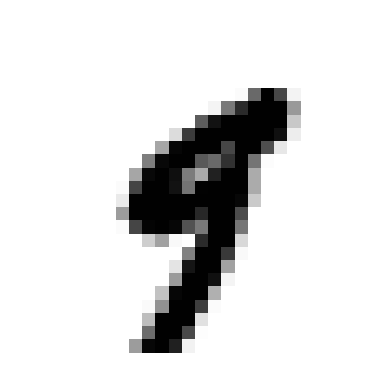

In [11]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary, interpolation ="nearest")
plt.axis('off')

In [12]:
x_train,x_test = x[:60000],x[60000:]
y_train,y_test = y[:60000],y[60000:]


# Data suffling is necessary

In [13]:
import numpy as np
shuffle_index = np.random.permutation(60000)

In [14]:
x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

# Creating a 2 detector

In [52]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)

In [54]:
y_test_2 = (y_test==2)


In [43]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression(tol=0.1,solver="lbfgs")

In [56]:
clf.fit(x_train,y_train_2)

c:\Users\amarn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [57]:
clf.predict([some_digit])

c:\Users\amarn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [58]:
from sklearn.model_selection import cross_val_predict

In [60]:
a=cross_val_predict(clf,x_train,y_train_2,cv=3)

c:\Users\amarn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\amarn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [61]:
a.mean()

0.09355

In [62]:
from sklearn.model_selection import cross_val_predict

In [63]:
y_train_predict = cross_val_predict(clf,x_train,y_train_2,cv=3)

c:\Users\amarn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\amarn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

# calculating confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(y_train_2,y_train_predict)

array([[53583,   459],
       [  804,  5154]], dtype=int64)

In [66]:
confusion_matrix(y_train_2,y_train_2)

array([[54042,     0],
       [    0,  5958]], dtype=int64)

# Precison and Recall

In [67]:
from sklearn.metrics import precision_score, recall_score

In [68]:
precision_score(y_train_2,y_train_predict)

0.9182255478353821

In [69]:
recall_score(y_train_2,y_train_predict)

0.865055387713998

# F1- Score

In [70]:
from sklearn.metrics import f1_score

In [71]:
f1_score(y_train_2,y_train_predict)

0.8908478091781177

# Precison, Recall Curve

In [72]:
from sklearn.metrics import precision_recall_curve

In [74]:
y_scores = cross_val_predict(clf,x_train,y_train_2,cv = 3)

c:\Users\amarn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\amarn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [75]:
precision,recall,threshold = precision_recall_curve(y_train_2,y_scores)

In [76]:
precision

array([0.0993    , 0.91822555, 1.        ])

<function matplotlib.pyplot.ylim(*args, **kwargs)>

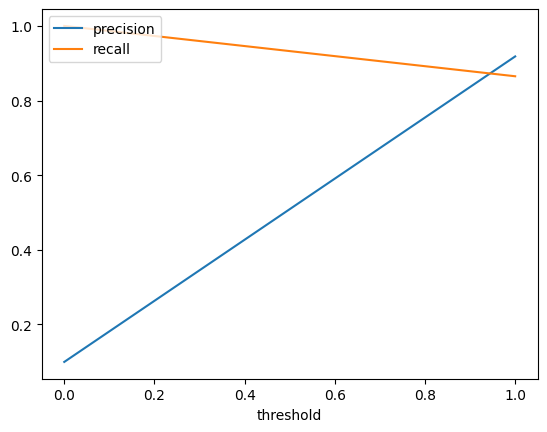

In [80]:
plt.plot(threshold,precision[:-1],label="precision")
plt.plot(threshold,recall[:-1],label = "recall")
plt.xlabel("threshold")
plt.legend(loc="upper left")
plt.ylim